Author: Dominique Grimes

Date: 4/16/23

In [1]:
# Load libraries
import pandas as pd
from textblob import TextBlob
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing,svm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB

# Get the stemmed data.

In [2]:
# Load the data into a dataframe. View the data to verify it loaded properly.
df = pd.read_csv('labeledTrainData.tsv',sep="\t")
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
# Use translate to remove punctuation and special characters.
df['review'] = df['review'].str.translate(str.maketrans('','', string.punctuation))

# Removing stop words with nltk and making lowercase.
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

# Stem words in review column using NLTK's PorterStemmer
porter=PorterStemmer()

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df['review'] = df['review'].apply(stem_sentences)

# Split this into a training and test set.

In [4]:
# Assign feature and target
feature = df['review']
target = df['sentiment']

# Split the data 80/20 using sklearn train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2)

# Fit and apply the tf-idf vectorization to the training set. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

When fitting the training set the mean is calculated to fill in the blank values. When using the test set, we want to use the mean calculated from the training set to fill in the blank values. If we fit the test set, we will be using the mean from the test set. That would be considered data leakage. 

In [5]:
# Create Numpy arrays from the stemmed review column 
# to create text varibles for tf-idf matrices on training & test sets

# Creat the tf-idf matrices
vectorizer=TfidfVectorizer()
trainfeature_matrix=vectorizer.fit_transform(feature_train)
testfeature_matrix=vectorizer.transform(feature_test)

# Train a logistic regression using the training data.

In [6]:
# Create logistic regression object
log_reg = LogisticRegression(random_state=1)

# Train model
model = log_reg.fit(trainfeature_matrix, target_train) 

# Find the model accuracy on test set.

In [7]:
# Use accuracy score from sklearn to calculate accuracy of logistic regression model against given sentiment.
test_predict=log_reg.predict(testfeature_matrix)
accuracy_score(target_test, test_predict)

0.8804

# Create a confusion matrix for the test set predictions.

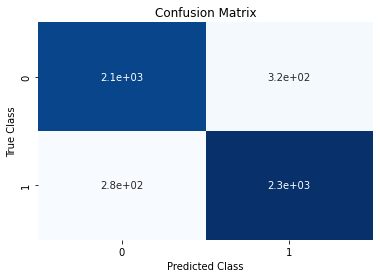

In [8]:

# Create confusion matrix
conf_matrix = confusion_matrix(target_test, test_predict)

# Create pandas dataframe
dataframe = pd.DataFrame(conf_matrix)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [9]:
# View confusion matrix as an array
conf_matrix

array([[2121,  318],
       [ 280, 2281]])

# Get the precision, recall, and F1-score for the test set predictions.

In [10]:
print(classification_report(target_test, test_predict))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2439
           1       0.88      0.89      0.88      2561

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



# Create a ROC curve for the test set.

In [11]:
# Use roc_curve() to get the threshold, TPR, and FPR
fpr, tpr, thresholds = roc_curve(target_test, test_predict)

In [12]:
# View the FPR, TPR, and threshold array
print("FPR:", fpr)
print("TPR:", tpr)
print("thresholds:", thresholds)

FPR: [0.        0.1303813 1.       ]
TPR: [0.         0.89066771 1.        ]
thresholds: [2 1 0]


In [13]:
# for AUC use roc_auc_score() for ROC
logit_roc_auc1=roc_auc_score(target_test, test_predict)

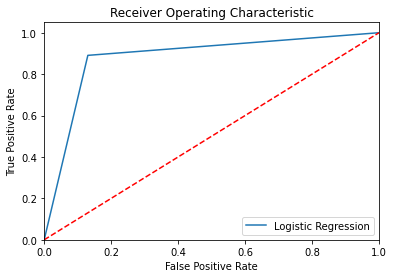

In [14]:
# Plot the ROC curve

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression' % logit_roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Pick another classification model and repeat steps.

Train a Naive Bayes model using the training data.

In [15]:
# Create a multinomial naive Bayes object with prior probabilities of each class
classifier = MultinomialNB(class_prior=[0.25, 0.5])

# Train model
modelNB = classifier.fit(trainfeature_matrix, target_train) 

Find the Naive Bayes model accuracy on the test set.

In [16]:
# Use accuracy score from sklearn to calculate accuracy of Naive Bayes model against given sentiment.
NBtest_predict=classifier.predict(testfeature_matrix)
accuracy_score(target_test, NBtest_predict)

0.8264

Create a confusion matrix for the test set predictions for Naive Bayes.

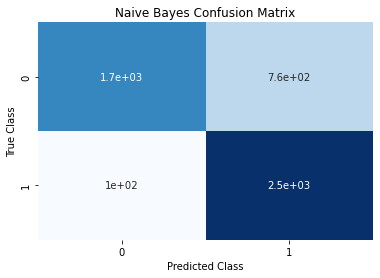

In [17]:
# Create confusion matrix
NBconf_matrix = confusion_matrix(target_test, NBtest_predict)

# Create pandas dataframe
NBdataframe = pd.DataFrame(NBconf_matrix)

# Create heatmap
sns.heatmap(NBdataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [18]:
# View confusion matrix array
NBconf_matrix

array([[1676,  763],
       [ 105, 2456]])

Get the precision, recall, and F1-score for the test set predictions for Naive Bayes.

In [19]:
print(classification_report(target_test, NBtest_predict))

              precision    recall  f1-score   support

           0       0.94      0.69      0.79      2439
           1       0.76      0.96      0.85      2561

    accuracy                           0.83      5000
   macro avg       0.85      0.82      0.82      5000
weighted avg       0.85      0.83      0.82      5000



Create a ROC curve for the test set.

In [20]:
# Use roc_curve() to get the threshold, TPR, and FPR for Naive Bayes
NBfpr, NBtpr, NBthresholds = roc_curve(target_test, NBtest_predict)

In [24]:
# View the FPR, TPR, and threshold array for Naive Bayes
print("FPR:", NBfpr)
print("TPR:", NBtpr)
print("thresholds:", NBthresholds)

FPR: [0.         0.31283313 1.        ]
TPR: [0.         0.95900039 1.        ]
thresholds: [2 1 0]


In [22]:
# for AUC use roc_auc_score() for ROC
NB_roc_auc1=roc_auc_score(target_test, NBtest_predict)

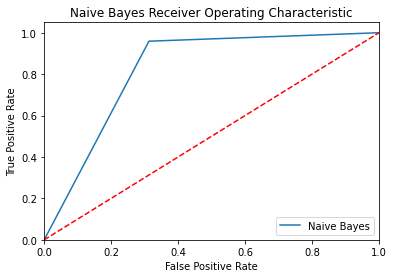

In [23]:
# Plot the ROC curve Naive Bayes
plt.figure()
plt.plot(NBfpr, NBtpr, label='Naive Bayes' % NB_roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()